In [11]:
# 시각화 라이브러리
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 지도 시각화를 위한 라이브러리
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cctv_busan = pd.read_csv('data/cctv_busan.csv')

print(cctv_busan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        212 non-null    int64  
 1   name      212 non-null    object 
 2   lng       212 non-null    float64
 3   lat       212 non-null    float64
 4   url       212 non-null    object 
 5   geometry  212 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 10.1+ KB
None


C:\Users\82108\AppData\Local\Temp\ipykernel_38324\3264862345.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='id',y='geometry', hue='name', ci=None)
C:\Users\82108\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\82108\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\82108\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inste

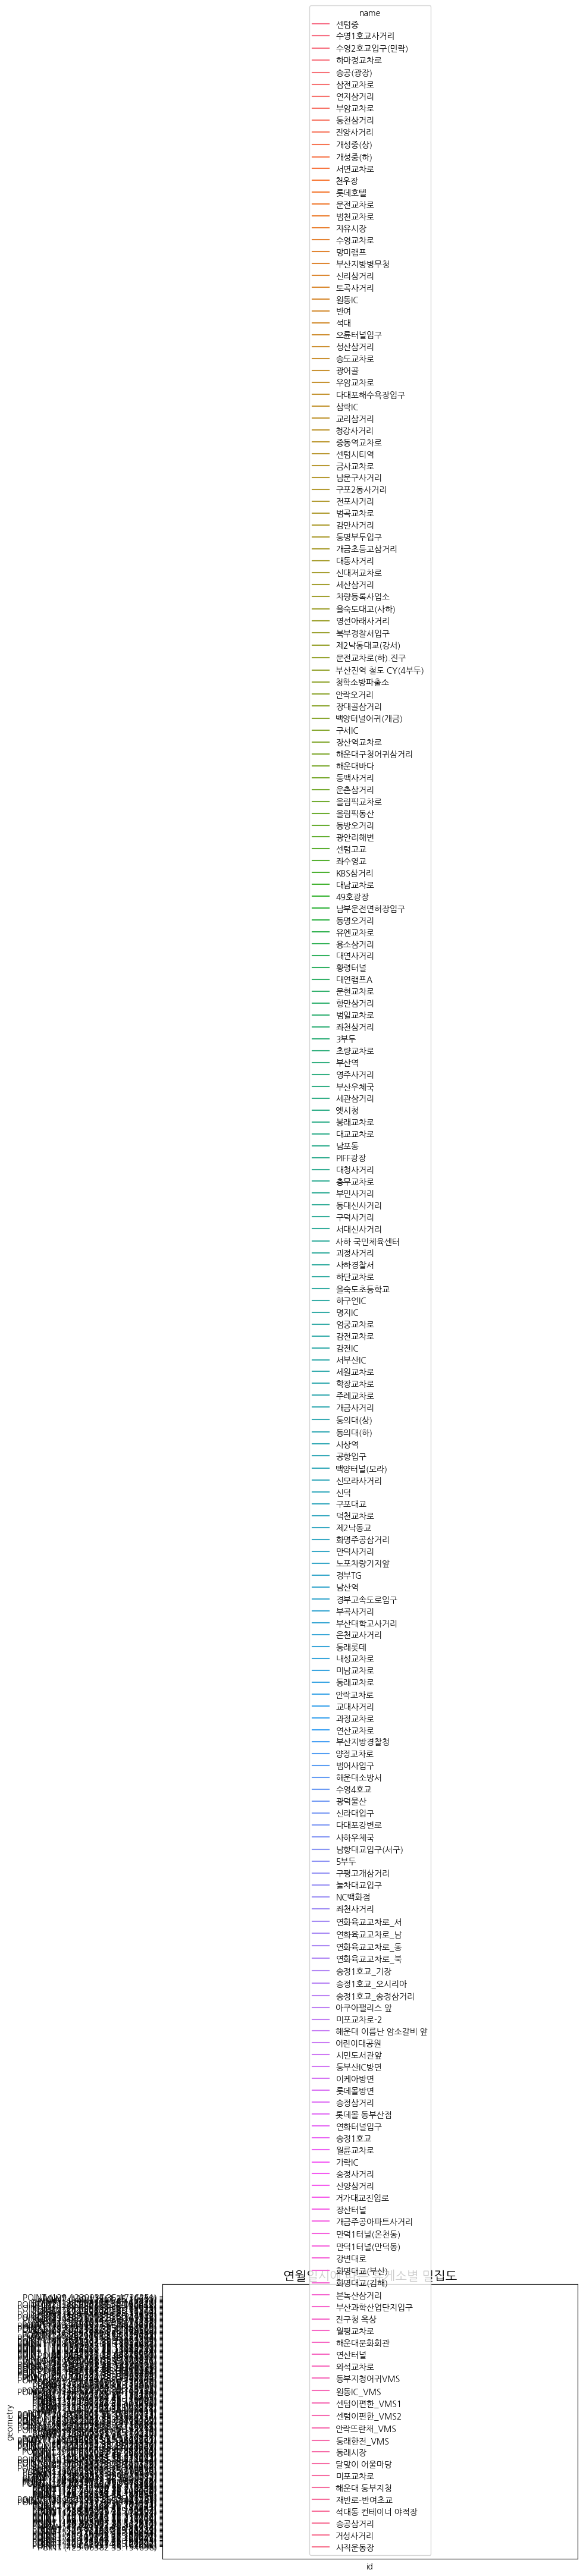

In [10]:
#휴게소별 연월일시에 따른 밀집도

plt.figure(figsize=(9,6))
plt.xticks(rotation=-45)
df=cctv_busan.loc[:,['id','geometry','name']]
sns.lineplot(data=df, x='id',y='geometry', hue='name', ci=None)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.title('연월일시에 따른 휴게소별 밀집도', fontdict={'fontsize':15})
plt.show()

In [6]:
cctv_busan = pd.read_csv('data/cctv_busan.csv')
cctv_busan = pd.DataFrame(data=cctv_busan, columns=['id','name','lng','lat', 'url', 'geometry'])
cctv_busan.head(3)

,id,name,lng,lat,url,geometry
0,79,센텀중,129.123994,35.173625,https://its.busan.go.kr/traffic/exclude/cctvPo...,POINT (129.1239937 35.1736251)
1,53,수영1호교사거리,129.125610,35.165390,https://its.busan.go.kr/traffic/exclude/cctvPo...,POINT (129.12561 35.16539)
2,54,수영2호교입구(민락),129.128130,35.159910,https://its.busan.go.kr/traffic/exclude/cctvPo...,POINT (129.12813 35.15991)


In [57]:
cctv_busan = pd.read_csv('data/cctv_busan.csv')

신호등_busan = pd.read_csv('data/신호등_busan.csv')

진로변경방법위반_busan = pd.read_csv('data/진로변경방법위반_busan.csv')
중앙선침범_busan = pd.read_csv('data/중앙선침범_busan.csv')
정지선침범_busan = pd.read_csv('data/정지선침범_busan.csv')
신호위반_busan = pd.read_csv('data/신호위반_busan.csv') 
꼬리물기_busan = pd.read_csv('data/꼬리물기_busan.csv') 

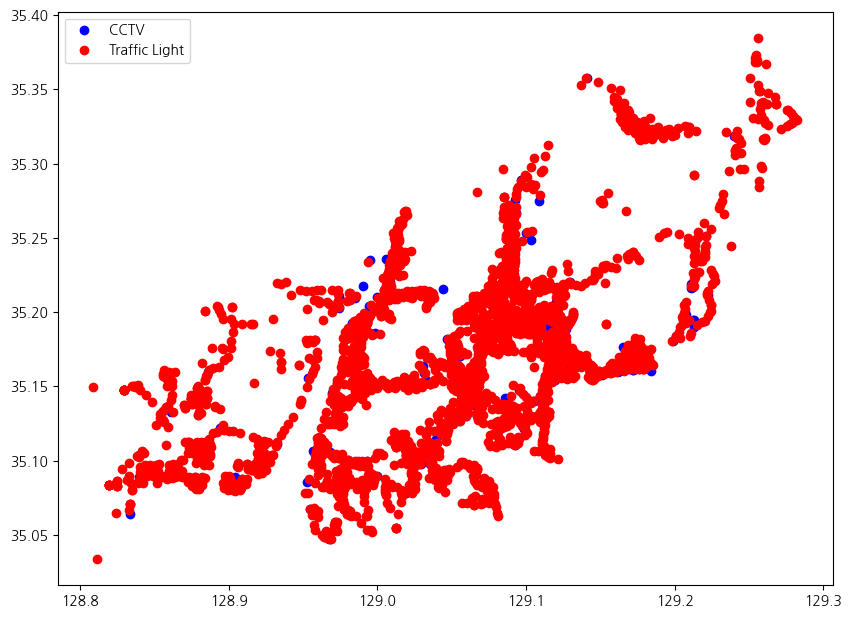

In [16]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_traffic_light = gpd.GeoDataFrame(신호등_busan, geometry=gpd.points_from_xy(신호등_busan.lng, 신호등_busan.lat))

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(10, 10))

# CCTV 위치 표시
gdf_cctv.plot(ax=ax, color='blue', label='CCTV')

# 신호등 위치 표시
gdf_traffic_light.plot(ax=ax, color='red', label='Traffic Light')

plt.legend()
plt.show()

In [55]:
# 엑셀 파일 불러오기
df = pd.read_excel('data/꼬리물기_busan.xlsx')

# 위도와 경도로부터 Point 객체 생성하여 'geometry' 컬럼에 저장
df['geometry'] = gpd.points_from_xy(df.lng, df.lat)

# DataFrame을 GeoDataFrame으로 변환
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# 확인
print(gdf.head())


    월   일        lat         lng                    주소  \
0  12  31  35.167787  129.133453  부산광역시 해운대구 우동 1524번길   
1  12  31  35.144835  128.969328   부산광역시 사상구 감전동 518번길   
2  12  31  35.144816  128.969393   부산광역시 사상구 감전동 518번길   
3  12  30  35.163494  129.132887  부산광역시 해운대구 우동 1427번길   
4  12  28  35.247298  129.094354   부산광역시 금정구 구서동 481번길   

                     geometry  
0  POINT (129.13345 35.16779)  
1  POINT (128.96933 35.14483)  
2  POINT (128.96939 35.14482)  
3  POINT (129.13289 35.16349)  
4  POINT (129.09435 35.24730)  


In [56]:
gdf['geometry'] = gdf['geometry'].apply(lambda x: str(x))

# Excel 파일로 저장하기
gdf.to_excel('꼬리물기_busan.xlsx', index=False)

C:\Users\82108\AppData\Local\Temp\ipykernel_38324\238986123.py:1: UserWarning: Geometry column does not contain geometry.
  gdf['geometry'] = gdf['geometry'].apply(lambda x: str(x))


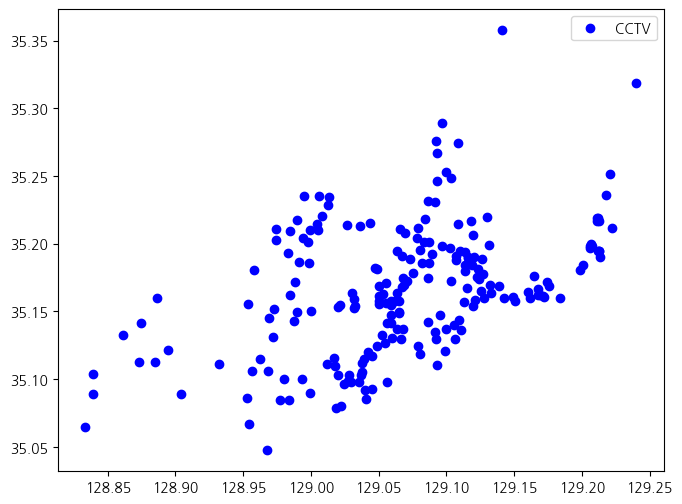

In [34]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
# gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(12, 6))

# CCTV 위치 표시
gdf_cctv.plot(ax=ax, color='blue', label='CCTV')

# 신호등 위치 표시
# gdf_진로변경방법위반.plot(ax=ax, color='red', label='진로변경방법위반_busan')

plt.legend()
plt.show()

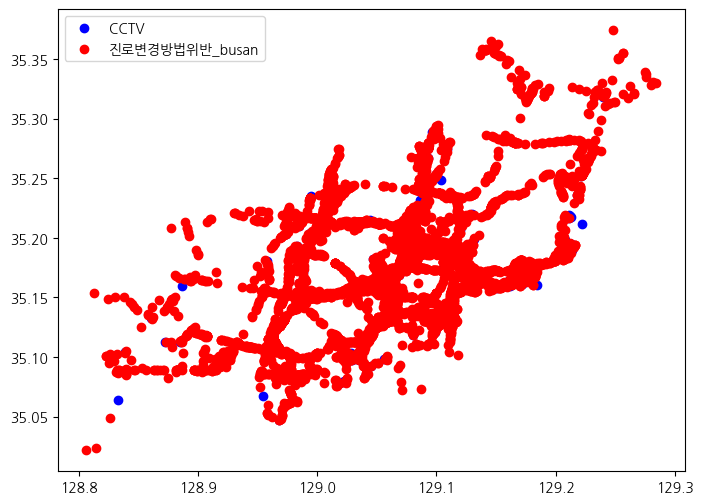

In [33]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(12, 6))

# CCTV 위치 표시
gdf_cctv.plot(ax=ax, color='blue', label='CCTV')

# 신호등 위치 표시
gdf_진로변경방법위반.plot(ax=ax, color='red', label='진로변경방법위반_busan')

plt.legend()
plt.show()

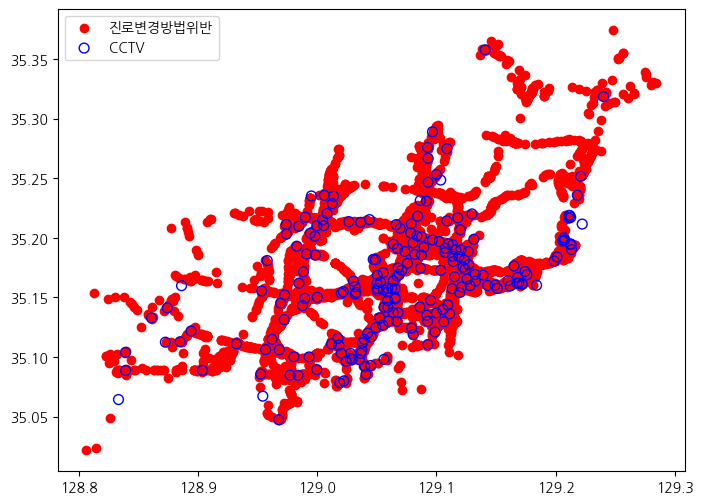

In [41]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(12, 6))

# 진로변경방법위반 위치 표시 (먼저 그림)
gdf_진로변경방법위반.plot(ax=ax, color='red', label='진로변경방법위반')

# CCTV 위치 표시 (나중에 그림)
gdf_cctv.plot(ax=ax, facecolor='none', color='blue', markersize=50,label='CCTV')  # markersize 추가

plt.legend()
plt.show()

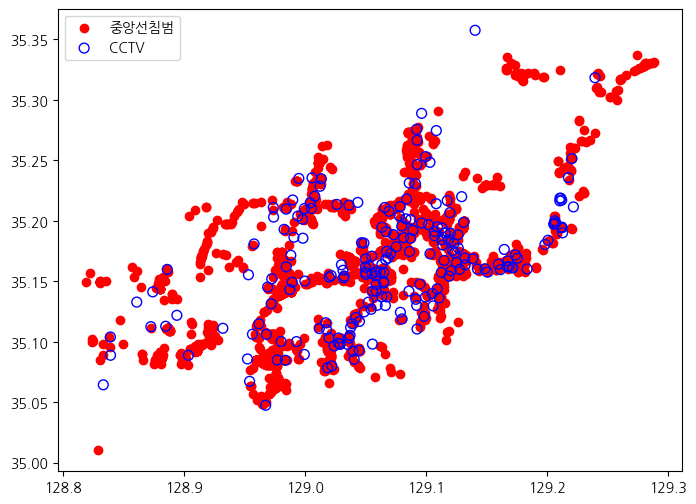

In [48]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_중앙선침범 = gpd.GeoDataFrame(중앙선침범_busan, geometry=gpd.points_from_xy(중앙선침범_busan.lng, 중앙선침범_busan.lat))

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(12, 6))

# 중앙선침범 위치 표시 (먼저 그림)
gdf_중앙선침범.plot(ax=ax, color='red', label='중앙선침범')

# CCTV 위치 표시 (나중에 그림)
gdf_cctv.plot(ax=ax, facecolor='none', color='blue', markersize=50,label='CCTV')  # markersize 추가

plt.legend()
plt.show()

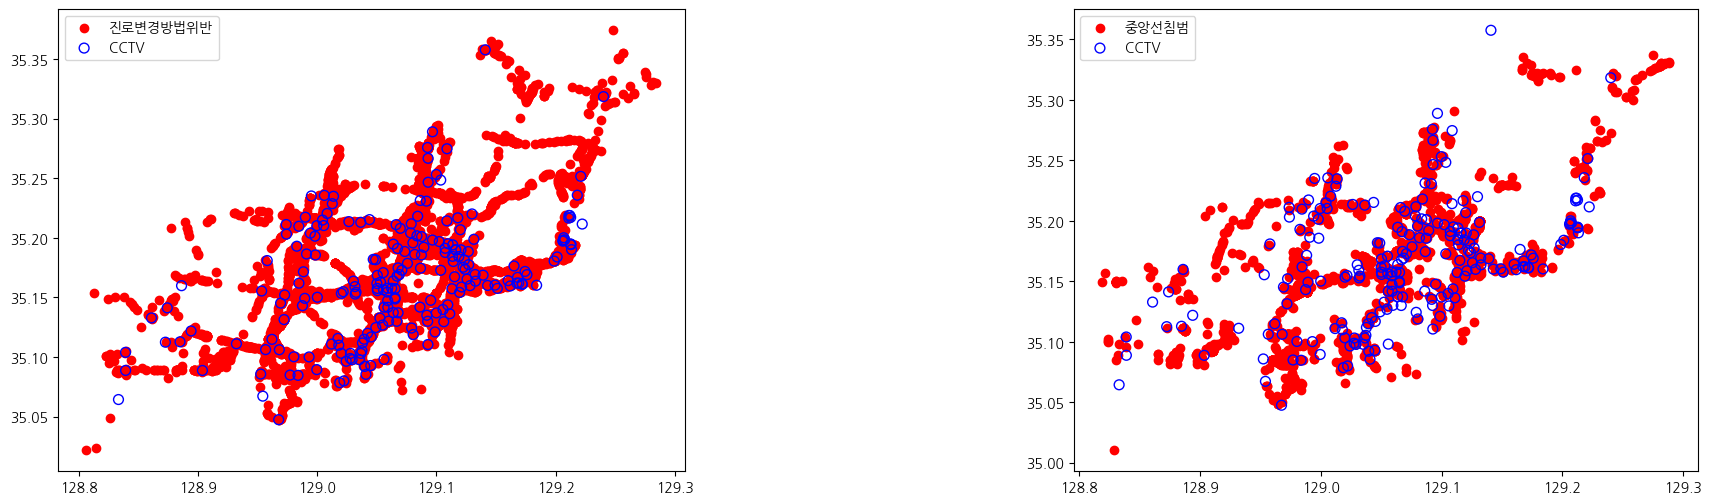

In [49]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))
gdf_중앙선침범 = gpd.GeoDataFrame(중앙선침범_busan, geometry=gpd.points_from_xy(중앙선침범_busan.lng, 중앙선침범_busan.lat))

# 그래프 사이즈 설정 및 1x2 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))  # ncols=2

# 진로변경방법위반 위치 표시 (첫 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[0], color='red', label='진로변경방법위반')
gdf_cctv.plot(ax=axs[0], facecolor='none', color='blue', markersize=50,label='CCTV')  
axs[0].legend()

# 중앙선침범 위치 표시 (두 번째 서브플롯)
gdf_중앙선침범.plot(ax=axs[1], color='red', label='중앙선침범')
gdf_cctv.plot(ax=axs[1], facecolor='none', color='blue', markersize=50,label='CCTV')  
axs[1].legend()

plt.show()